# Initial analysis of the data

Dataset: [Spotify and Youtube](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube?resource=download)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create pandas dataframe from csv file
df = pd.read_csv('source_dataset/Spotify_Youtube.csv')

In [3]:
# Shape of dataframe
print(df.shape)

(20718, 28)


In [4]:
# Convert Unamed column to index and rename to 'id'
df = df.rename(columns={'Unnamed: 0': 'id'})
df = df.set_index('id')

In [5]:
# Display the column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


In [6]:
# Display the first 5 rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
      Artist                                        Url_spotify  \
id                                                                
0   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4   Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                            Track  \
id                                                  
0                                  Feel Good Inc.   
1                                 Rhinestone Eyes   
2   New Gold (feat. Tame Impala and Bootie Brown)   
3                              On Melancholy Hill   
4                                  Clint Eastwood   

                                            Album Album_type  \
id                                                             
0              

In [7]:
# Display the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object


In [8]:
print("\nNumber of unique values:")
print(df.nunique())
# Drop rows with missing values in 'Likes' or 'Views' columns
df = df.dropna(subset=['Likes', 'Views'])


Number of unique values:
Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64


Create popularity categories

In [9]:

# Drop rows with missing values in 'Likes' or 'Views' columns
df = df.dropna(subset=['Likes', 'Views'])

# Calculate normalized popularity score
normalized_likes = (df['Likes'] - df['Likes'].min()) / (df['Likes'].max() - df['Likes'].min())
normalized_views = (df['Views'] - df['Views'].min()) / (df['Views'].max() - df['Views'].min())

# Assign weights to normalized likes and views
likes_weight = 0.7
views_weight = 0.3

# Calculate popularity score
popularity_score = (normalized_likes * likes_weight) + (normalized_views * views_weight)

# Define popularity class thresholds
popularity_thresholds = np.percentile(popularity_score, [0, 30, 70, 90])

# Assign popularity class based on popularity score
popularity_labels = ['Low Popularity', 'Moderate Popularity', 'High Popularity', 'Very High Popularity']
popularity = np.select(
    [popularity_score <= popularity_thresholds[1],
     popularity_score <= popularity_thresholds[2],
     popularity_score <= popularity_thresholds[3],
     popularity_score > popularity_thresholds[3]],
    popularity_labels, default=popularity_labels[-1])

# Add new columns to the DataFrame
df['Popularity Score'] = popularity_score
df['Popularity'] = popularity

In [10]:
# Display the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
Popularity Score    float64
Popularity           object
dtype: object


In [11]:
print(df['Popularity'].value_counts())

Moderate Popularity     8071
Low Popularity          6053
High Popularity         4035
Very High Popularity    2018
Name: Popularity, dtype: int64


In [13]:
# encode popularity column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Popularity'] = le.fit_transform(df['Popularity'])

# drop categorical columns
df = df.drop(['Artist', 'Track', 'Album', 'Url_spotify', 'Uri', 'Description', 'Channel', 'Title', 'Url_youtube'], axis=1)

# drop popularity score column
df = df.drop(['Popularity Score'], axis=1)

# display the first 5 rows
print(df.head())

   Album_type  Danceability  Energy   Key  Loudness  Speechiness  \
id                                                                 
0       album         0.818   0.705   6.0    -6.679       0.1770   
1       album         0.676   0.703   8.0    -5.815       0.0302   
2      single         0.695   0.923   1.0    -3.930       0.0522   
3       album         0.689   0.739   2.0    -5.810       0.0260   
4       album         0.663   0.694  10.0    -8.627       0.1710   

    Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  \
id                                                                            
0       0.008360          0.002330    0.6130    0.772  138.559     222640.0   
1       0.086900          0.000687    0.0463    0.852   92.761     200173.0   
2       0.042500          0.046900    0.1160    0.551  108.014     215150.0   
3       0.000015          0.509000    0.0640    0.578  120.423     233867.0   
4       0.025300          0.000000    0.0698    0

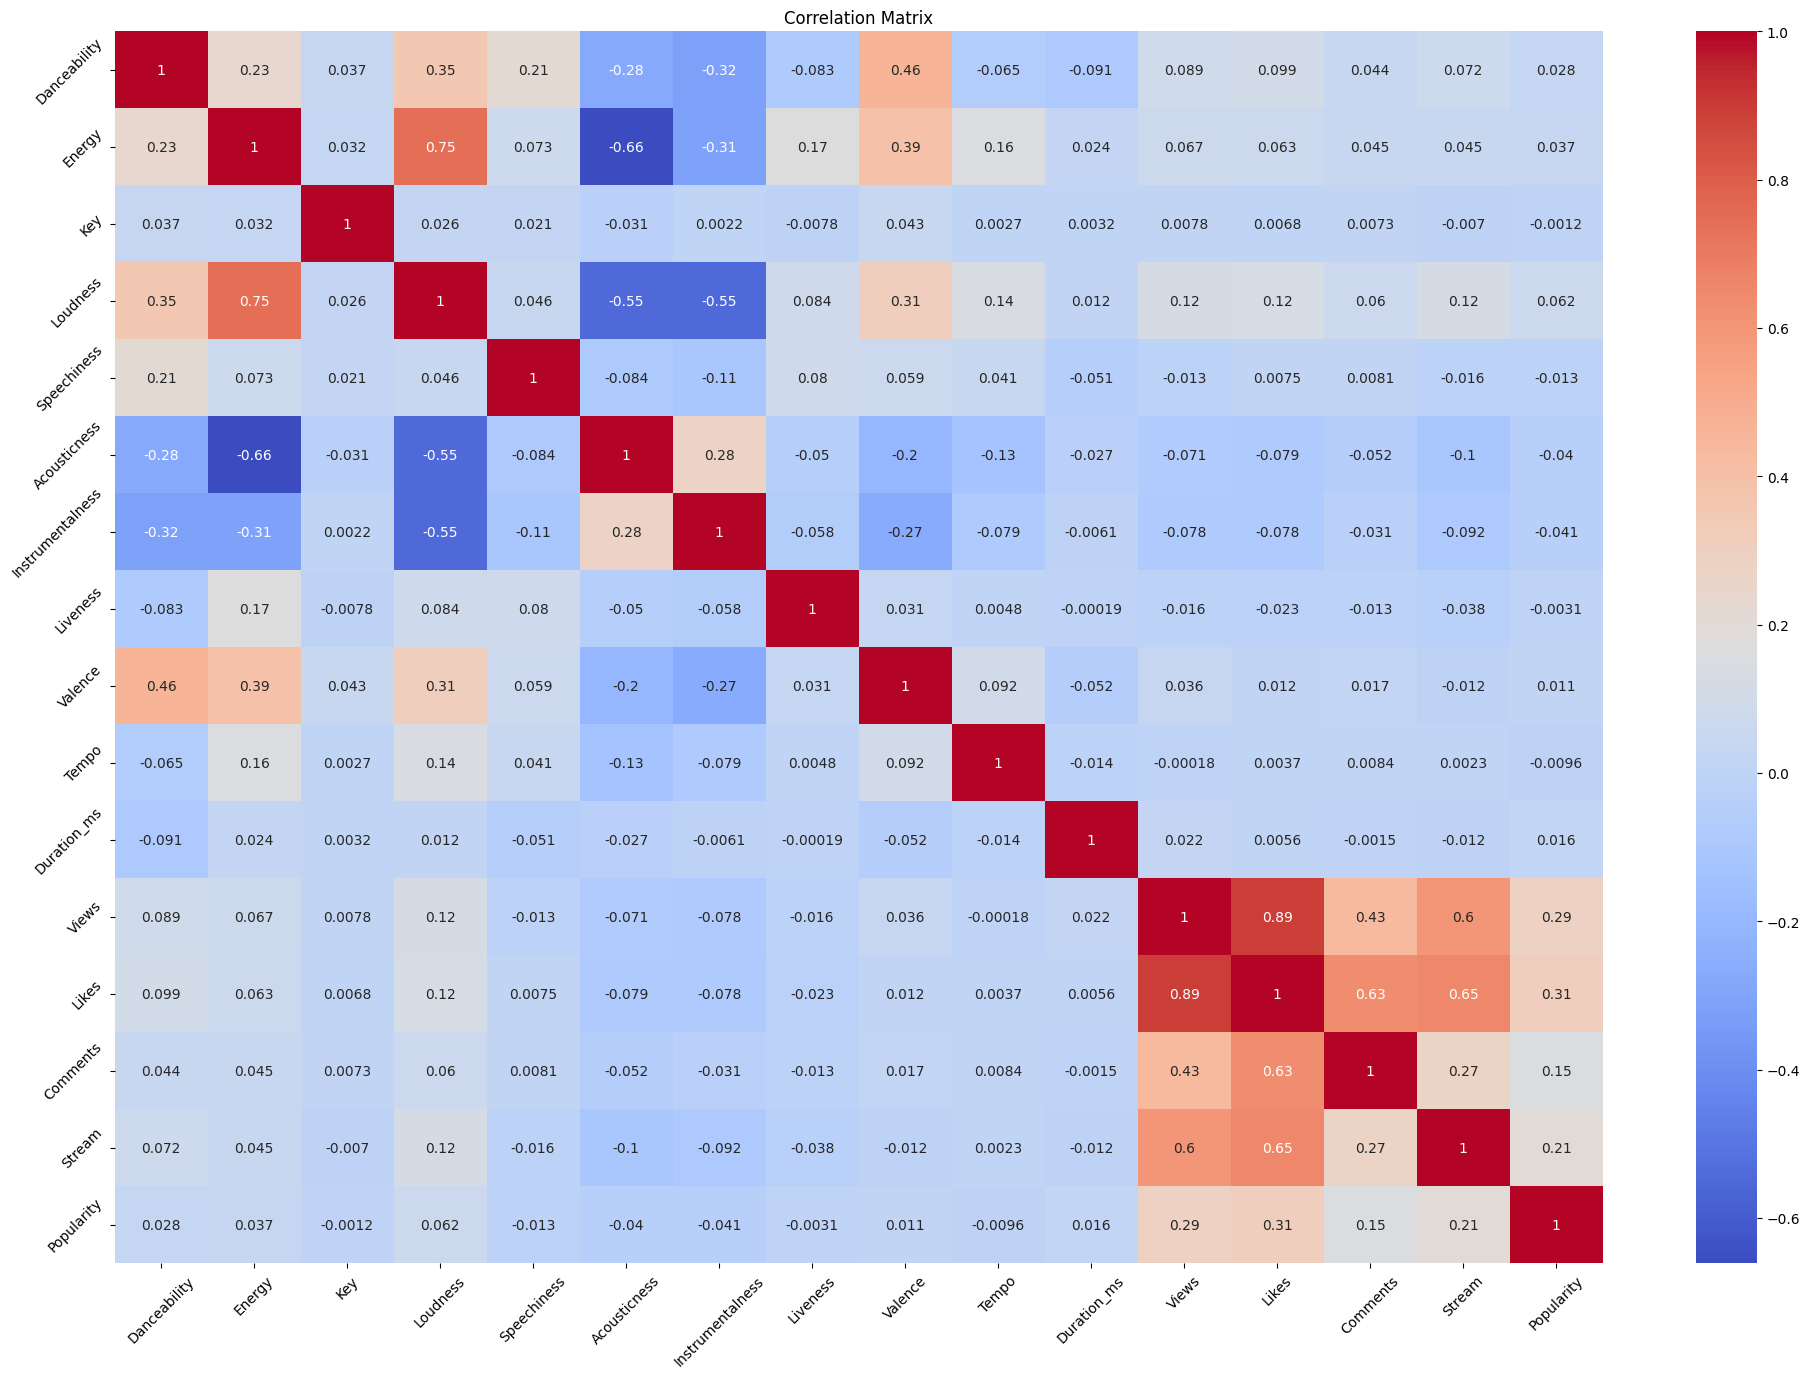

In [23]:
# Create a correlation matrix and heatmap

import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

# Rescale the plot, and add title and axis ticks

plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [12]:
# Download the dataframe as a csv file
df.to_csv('datasets/Spotify_YoutubeClean.csv')